In [ ]:
import gstlearn as gl
import gstlearn.plot as gp
import os
import requests

In [ ]:
url = 'http://rgeostats.free.fr/doc/Files/Scotland_Temperatures.csv'
r = requests.get(url, allow_redirects=True)
filepath = 'Scotland_Temperatures.csv'
open(filepath, 'wb').write(r.content)

4287

In [7]:
csvf = gl.CSVformat()
csvf.setCharDec('.')
mydb = gl.Db.createFromCSV(filepath, verbose = False, csv = csvf) # URL ?
type(mydb)
mydb


Data Base Characteristics

Data Base Summary
-----------------
File is organized as a set of isolated points
Space dimension              = 0
Number of Columns            = 5
Maximum Number of UIDs       = 5
Total number of samples      = 236

Variables
---------
Column = 0 - Name = rank - Locator = NA
Column = 1 - Name = Longitude - Locator = NA
Column = 2 - Name = Latitude - Locator = NA
Column = 3 - Name = Elevation - Locator = NA
Column = 4 - Name = January_temp - Locator = NA

In [27]:
#plot(cloud.calc(dat),asp=0,title="")
#varioexp = vario.calc(dat,lag=10,nlag=40)
#class(varioexp)
#class?vario
#varioexp
#plot(varioexp)

# Définition des paramètres de variogramme
myVarioParamOmni = gl.VarioParam()
mydir = gl.DirParam(2,40,10) # TODO : Supprimer ndim (2) dans le futur
myVarioParamOmni.addDirs(mydir)
myVarioParamOmni.display() # TODO : Lag value is missing, Why Grid Ddirection ?

Number of direction(s)      = 1
Space dimension             = 2

Direction #1
------------
Number of lags              = 40
Grid Direction coefficients =          1         0
 

In [ ]:

# Fonction "old school" pour le "Variogram Cloud"
# TODO : Amélioration du message d'erreur (si pas de locator X)
dbcloud = gl.db_variogram_cloud(mydb, myVarioParamOmni)


In [11]:
mydb.setLocators(["Long*", "Lat*"],gl.ELoc.X)
mydb.setLocator("January_temp",gl.ELoc.Z)
mydb


Data Base Characteristics

Data Base Summary
-----------------
File is organized as a set of isolated points
Space dimension              = 2
Number of Columns            = 5
Maximum Number of UIDs       = 5
Total number of samples      = 236

Variables
---------
Column = 0 - Name = rank - Locator = NA
Column = 1 - Name = Longitude - Locator = x1
Column = 2 - Name = Latitude - Locator = x2
Column = 3 - Name = Elevation - Locator = NA
Column = 4 - Name = January_temp - Locator = z1

In [19]:
help(gl.db_variogram_cloud)

Help on function db_variogram_cloud in module gstlearn:

db_variogram_cloud(*args, **kwargs) -> 'DbGrid *'



In [12]:
#gp.grid(dbcloud,"Cloud*",title="Variogram Cloud")
dbcloud = gl.db_variogram_cloud(mydb, myVarioParamOmni)
dbcloud

# TODO : Locatoriser Z la variable Cloud.January_temp
#


Data Base Grid Characteristics

Data Base Summary
-----------------
File is organized as a regular grid
Space dimension              = 2
Number of Columns            = 4
Maximum Number of UIDs       = 4
Total number of samples      = 10000

Grid characteristics:
---------------------
Origin :      0.000     0.000
Mesh   :      7.789     0.106
Number :        100       100

Variables
---------
Column = 0 - Name = rank - Locator = NA
Column = 1 - Name = x1 - Locator = x1
Column = 2 - Name = x2 - Locator = x2
Column = 3 - Name = Cloud.January_temp - Locator = NA

In [20]:
dbfmt = gl.DbStringFormat()
dbfmt.setParams(gl.FLAG_VARS | gl.FLAG_STATS)
dbcloud.display(dbfmt)


Data Base Grid Characteristics

Data Base Statistics
--------------------
1 - Name rank - Locator NA
 Nb of data          =      10000
 Nb of active values =      10000
 Minimum value       =      1.000
 Maximum value       =  10000.000
 Mean value          =   5000.500
 Standard Deviation  =   2886.751
 Variance            = 8333333.250
2 - Name x1 - Locator x1
 Nb of data          =      10000
 Nb of active values =      10000
 Minimum value       =      0.000
 Maximum value       =    771.100
 Mean value          =    385.550
 Standard Deviation  =    224.835
 Variance            =  50550.653
3 - Name x2 - Locator x2
 Nb of data          =      10000
 Nb of active values =      10000
 Minimum value       =      0.000
 Maximum value       =     10.474
 Mean value          =      5.237
 Standard Deviation  =      3.054
 Variance            =      9.327
4 - Name Cloud.January_temp - Locator NA
 Nb of data          =      10000
 Nb of active values =       1608
 Minimum value       =  

<AxesSubplot:title={'center':'Variogram Cloud'}>

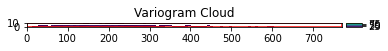

In [21]:
gp.grid(dbcloud,"Cloud*",title="Variogram Cloud")
# TODO :
# - Proposer un bon réglage des facteurs d'échelle par défaut dans gp.grid

<AxesSubplot:title={'center':'Variogram Cloud'}>

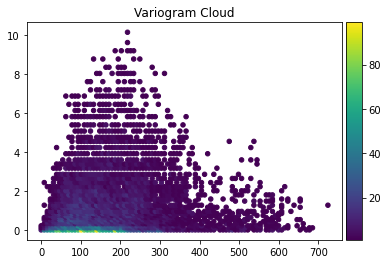

In [16]:
# Possible with points display
gp.point(dbcloud,"Cloud*",title="Variogram Cloud")

In [22]:
# Compute the experimental variogram
myVarioOmni = gl.Vario(myVarioParamOmni,mydb)
err = myVarioOmni.compute("vg") # TODO : Use the ENUM 
myVarioOmni.display()

# TODO : 
# - Créer un ou plusieurs raccourci createFrom???? avec des paramètres directement en arguments


Variogram characteristics
Number of variable(s)       = 1
Number of direction(s)      = 1
Space dimension             = 2
Variance-Covariance Matrix     1.020

Direction #1
------------
Number of lags              = 40
Direction coefficients      =      1.000     0.000
Direction angles (degrees)  =      0.000     0.000
Tolerance on direction      =     90.000 (degrees)
Calculation lag             =     10.000
Tolerance on distance       =     50.000 (Percent of the lag value)

For variable 1
      Rank    Npairs  Distance     Value
         0    19.000     3.118     0.042
         1    89.000    10.690     0.172
         2   168.000    20.346     0.280
         3   244.000    30.323     0.456
         4   316.000    40.429     0.459
         5   385.000    50.162     0.660
         6   399.000    60.296     0.729
         7   463.000    70.062     0.874
         8   450.000    79.807     0.800
         9   473.000    90.115     0.977
        10   549.000   100.141     0.879
        11

In [29]:
# TODO : Fix direction display
myVarioParam2 = gl.VarioParam()
myVarioParam2.addMultiDirs(gl.generateMultipleDirs(2, 4, 10, 1))
myVarioParam2

Number of direction(s)      = 4
Space dimension             = 2

Direction #1
------------
Number of lags              = 10
Grid Direction coefficients =          1         0

Direction #2
------------
Number of lags              = 10
Grid Direction coefficients =          1         0

Direction #3
------------
Number of lags              = 10
Grid Direction coefficients =          1         0

Direction #4
------------
Number of lags              = 10
Grid Direction coefficients =          1         0

In [31]:
help(gl.Vario)

Help on class Vario in module gstlearn:

class Vario(AStringable, ASerializable, IClonable)
 |  Vario(*args)
 |  
 |  Method resolution order:
 |      Vario
 |      AStringable
 |      ASerializable
 |      IClonable
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, *args)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__(self) -> 'std::string'
 |      Return repr(self).
 |  
 |  addDirs(self, dirparam: 'DirParam') -> 'void'
 |  
 |  attachDb(self, *args, **kwargs) -> 'int'
 |  
 |  clone(self) -> 'IClonable *'
 |  
 |  compute(self, *args, **kwargs) -> 'int'
 |  
 |  computeIndic(self, *args, **kwargs) -> 'int'
 |  
 |  dumpToNF(self, neutralFilename: 'String const &', verbose: 'bool' = False) -> 'int'
 |  
 |  fill(self, idir: 'int', sw: 'VectorDouble', gg: 'VectorDouble', hh: 'VectorDouble') -> 'int'
 |  
 |  getAllGg(self, idir: 'int') -> 'VectorDouble const &'
 |  
 |  getAllHh(self, idir: 'int') -> 'VectorDouble 

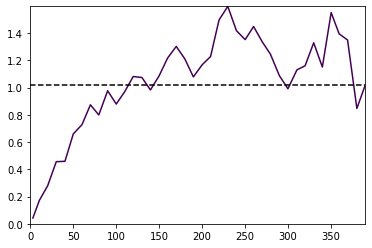

316.0

In [37]:
# TODO :
# - Ajouter title et autre kwargs (légende, couleurs, etc...)
# - Attention au nommage des arguments (prendre des noms différents de matplotlib pour les arguments propres à chaque fonction)
# - Attention au passage des kwargs aux fonctions de matplotlib (et dont on aurait également besoin dans la fonction)
# - Add number of pairs (and so on) (si on a le temps)
axs = gp.plot(myVarioOmni)

# TODO : Access by operator [] or column names ? (si on a le temps)
# Here : 1 is the second direction !! etc...
#myVarioOmni[1]$nlag
#myVarioOmni[1]$gg
# Example : Number of pairs for the first direction, and the fifth lag (si on a le temps)
#myVarioOmni[0].Npairs[4] # TODO (better)
myVarioOmni.getSwVec(0,0,0)[4] # Bof

In [26]:
# Should be also possible : => Done
# TODO :
# - Ajouter title et autre kwargs (légende, couleurs, etc...)
myVarioOmni.plot()

AttributeError: ignored

In [38]:
# Create empty model customized with the space dimension from the Db
mymodel = gl.Model.createFromDb(mydb)
err = mymodel.fit(myVarioOmni,[gl.ECov.EXPONENTIAL,gl.ECov.SPHERICAL])

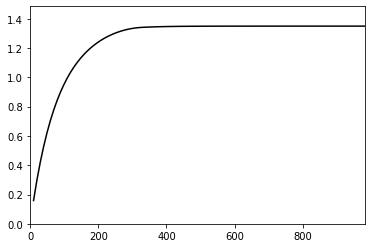

In [45]:
ax = gp.model(mymodel)
#gp.plot(mymodel) # TODO : error in generic function => Done

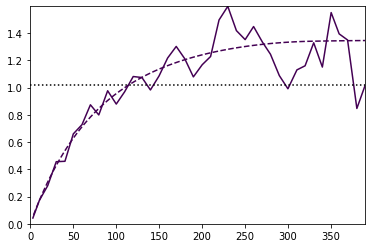

In [46]:
ax = gp.varmod(myVarioOmni,mymodel)